In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2,2,1,4.0,Relatively New,814.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.0,2,2,1,1.0,Old Property,588.0,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6723.0,2,2,3,12.0,New Property,538.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.0,2,2,2,2.0,New Property,1086.0,1,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,1,0


In [6]:
latlong = pd.read_csv('latlong.csv')

In [7]:
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [9]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [12]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [13]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [14]:
new_df = df.merge(latlong, on = 'sector')

In [15]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2,2,1,4.0,Relatively New,...,0,0,0,0,0,1,28,"28.4644° N, 77.0143° E",28.4644,77.0143
1,flat,apna enclave,sector 3,0.50,7692.0,2,2,1,1.0,Old Property,...,0,0,0,0,0,0,37,"28.4909° N, 77.0176° E",28.4909,77.0176
2,flat,smart world orchard,sector 61,1.47,12250.0,2,2,2,2.0,New Property,...,1,0,0,0,0,1,76,"28.4050° N, 77.0963° E",28.4050,77.0963
3,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,Under Construction,...,1,0,0,0,0,1,0,"28.4079° N, 76.9153° E",28.4079,76.9153
4,flat,signature global infinity mall,sector 36,0.41,6269.0,2,2,3,3.0,New Property,...,0,0,0,0,0,1,0,"28.4160° N, 76.9914° E",28.4160,76.9914


In [18]:
group_df = new_df[['sector', 'price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].groupby('sector').mean()


In [19]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
sector 1,1.107838,5198.621622,1931.740541,28.3663,76.9456
sector 10,2.092857,11866.571429,1718.714286,28.4537,77.0009
sector 102,1.696636,10603.822430,1529.719626,28.4750,76.9715
sector 103,1.488140,7416.488372,1832.023256,28.4949,76.9845
sector 104,1.622388,8873.895522,1746.134328,28.4788,76.9960
...,...,...,...,...,...
sector 91,1.648235,7586.117647,1944.000000,28.4014,76.9225
sector 92,0.934000,5928.290000,1490.651800,28.4079,76.9153
sector 93,0.848889,8009.888889,978.444444,28.4153,76.9326


C:\Users\SWAPN\AppData\Local\Temp\ipykernel_2052\953886383.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



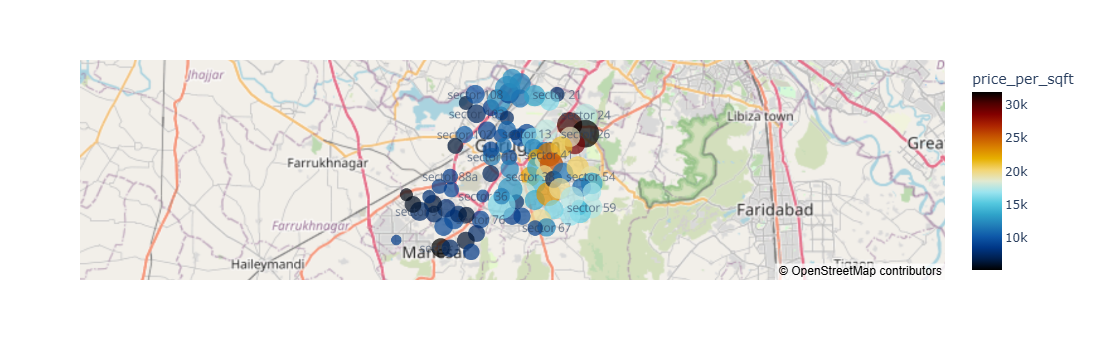

In [34]:
fig = px.scatter_mapbox(group_df , lat = "latitude" , lon = "longitude", color = "price_per_sqft" , size = "built_up_area" ,
                        color_continuous_scale = px.colors.cyclical.IceFire, zoom = 9.333 , 
                        mapbox_style = "open-street-map" , text = group_df.index) 

fig.show()

In [36]:
new_df.to_csv('data_viz1.csv',index = False)

In [40]:
df1 = pd.read_csv('merged_data_cleaned.csv')

In [42]:
df1.head()

,propert_type,society,sector,price_in_crore,price_per_sqft,area_in_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F..."
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',..."
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,2.0,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",NaN,"['Security / Fire Alarm', 'Private Garden / Te..."
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",[],NaN


In [44]:
wordcloud_df = df1[['features', 'sector', 'propert_type']]

In [47]:
wordcloud_df.sample(5)

,features,sector,propert_type
926,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 50,flat
3460,"['Security / Fire Alarm', 'Private Garden / Te...",sector 109,house
1755,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 81,flat
1764,"['Centrally Air Conditioned', 'Water purifier'...",sector 84,flat
3288,NaN,sector 4,house


In [50]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [51]:
main

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Lift(s)',
 'Water Storage',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Private Garden / Terrace',
 'Lift(s)',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Natural Light',
 'Airy Rooms',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Water softening plant',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Maintenance Staff',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Rain Water Harvesting',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 

In [54]:
from wordcloud import WordCloud


In [55]:
feature_text = ' '.join(main)

In [61]:
import pickle
pickle.dump(feature_text , open('feature_text.pkl','wb'))

In [56]:
plt.rcParams['font.family'] = "Arial"


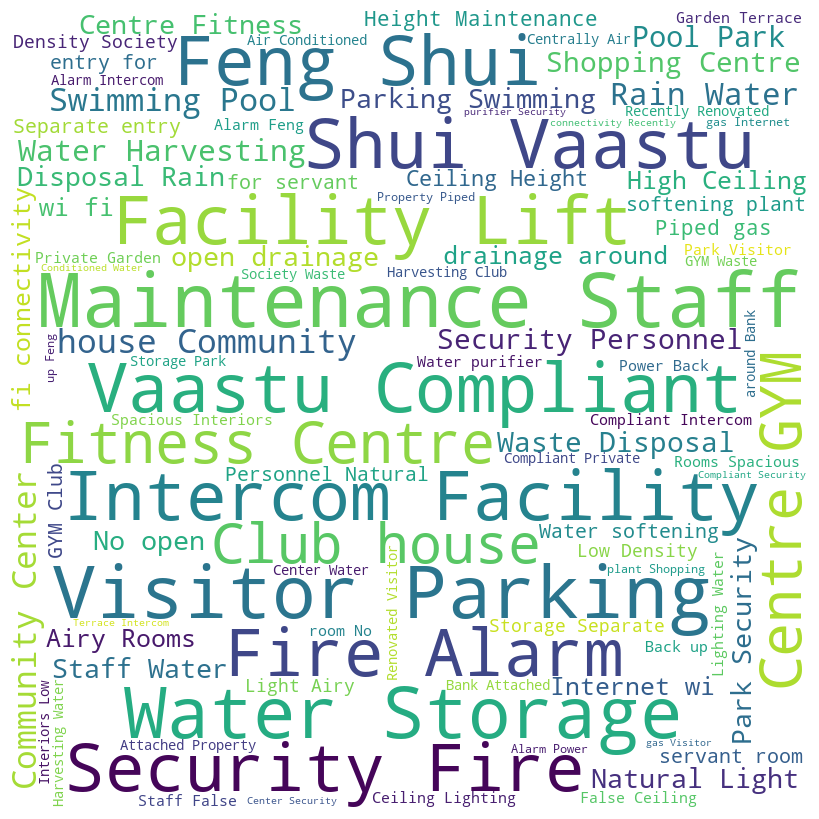

In [59]:
wordcloud = WordCloud(width = 800 , height = 800, 
                       background_color = 'white',
                      stopwords = set(['s']),
                      min_font_size = 10).generate(feature_text)
plt.figure(figsize = (8,8) , facecolor = None)
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

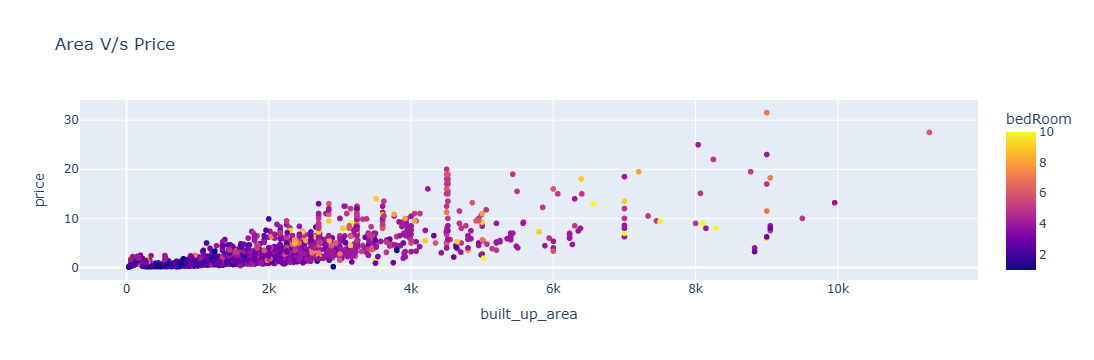

In [69]:
fig = px.scatter(df , x = "built_up_area" ,y = 'price', color =  "bedRoom" , title = " Area V/s Price")
fig.show()

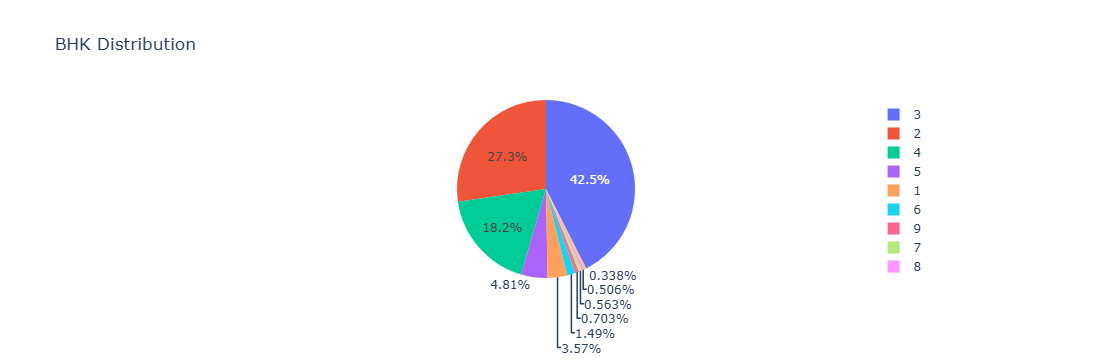

In [70]:
fig = px.pie(df, names='bedRoom' , title = "BHK Distribution")
fig.show()

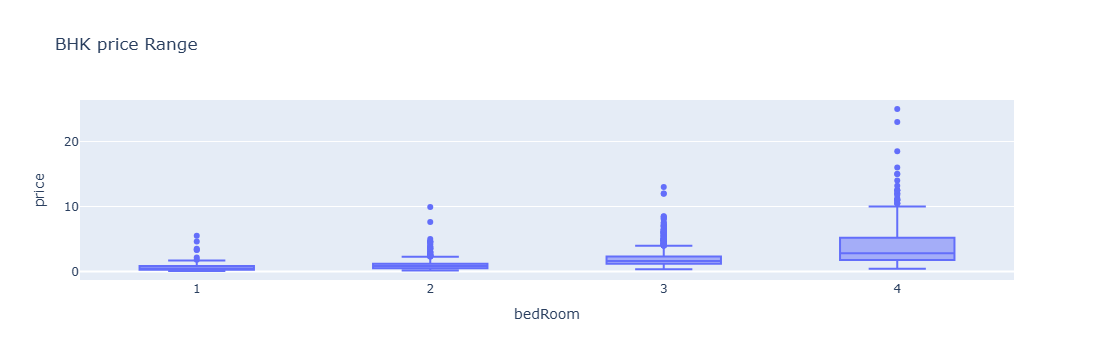

In [71]:
temp_df = df[df['bedRoom'] <= 4]
fig = px.box(temp_df , x = 'bedRoom' , y = 'price' , title = 'BHK price Range')
fig.show()

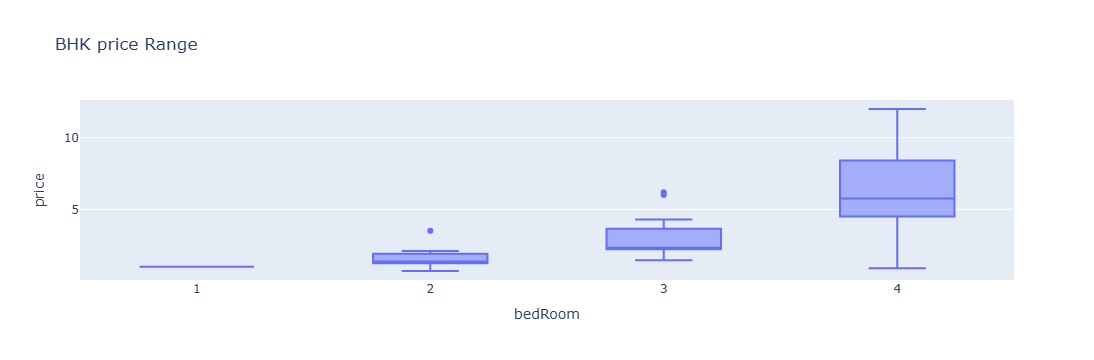

In [81]:
temp_df = df[df['sector'] == 'sector 28']
temp_df = temp_df[temp_df['bedRoom'] <= 4 ]
fig = px.box(temp_df , x = 'bedRoom' , y = 'price' , title = 'BHK price Range')
fig.show()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
49,flat,dlf regency park,sector 28,1.60,14545.0,2,2,2,3.0,Relatively New,995.0,0,0,0,0,0,1,52
193,flat,maruti vihar colony,sector 28,0.95,8887.0,2,1,1,1.0,Old Property,967.0,0,0,0,0,0,1,59
287,flat,maruti vihar,sector 28,1.00,9091.0,1,1,1,1.0,Old Property,995.0,1,0,0,1,0,0,80
327,flat,dlf regency park,sector 28,2.25,14516.0,3,3,2,16.0,Old Property,1700.0,0,1,0,0,0,1,89
359,flat,dlf regency park,sector 28,2.26,13697.0,3,3,2,19.0,Old Property,1700.0,0,1,0,0,0,1,158
366,flat,dlf regency park,sector 28,2.35,13225.0,3,3,2,18.0,Old Property,1608.0,0,1,0,0,0,1,120
585,flat,dlf regency park,sector 28,1.24,12400.0,2,2,3+,19.0,Moderately Old,1050.0,0,0,0,1,0,0,157
588,flat,dlf regency park,sector 28,1.35,11739.0,2,2,2,14.0,Old Property,1120.0,0,0,1,0,0,1,66
758,flat,dlf regency park,sector 28,2.30,11819.0,3,3,3,7.0,Moderately Old,1777.0,0,1,0,0,0,1,117
904,flat,dlf ridgewood estate,sector 28,2.00,14599.0,3,3,1,12.0,Old Property,1240.0,0,0,0,0,0,0,96


C:\Users\SWAPN\AppData\Local\Temp\ipykernel_2052\3889940090.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\SWAPN\AppData\Local\Temp\ipykernel_2052\3889940090.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

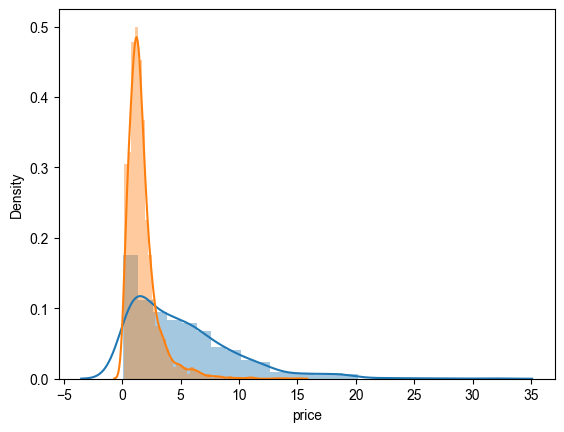

In [73]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])
    

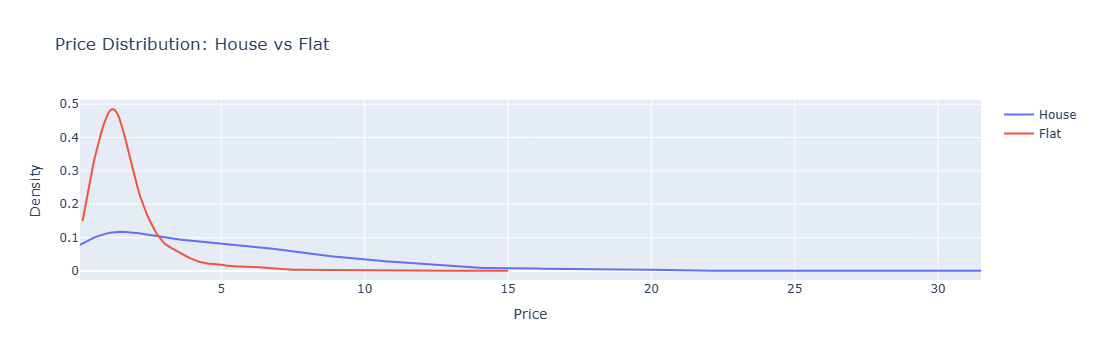

In [82]:
import plotly.graph_objects as go
# import numpy as np
from scipy.stats import gaussian_kde

# House
house_prices = df[df['property_type'] == 'house']['price']
house_kde = gaussian_kde(house_prices)
x_house = np.linspace(house_prices.min(), house_prices.max(), 200)
y_house = house_kde(x_house)

# Flat
flat_prices = df[df['property_type'] == 'flat']['price']
flat_kde = gaussian_kde(flat_prices)
x_flat = np.linspace(flat_prices.min(), flat_prices.max(), 200)
y_flat = flat_kde(x_flat)

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_house, y=y_house, mode='lines', name='House'))
fig.add_trace(go.Scatter(x=x_flat, y=y_flat, mode='lines', name='Flat'))

fig.update_layout(title='Price Distribution: House vs Flat',
                  xaxis_title='Price', yaxis_title='Density')
# st.plotly_chart(fig)
